# Time series analysis with veganism data
Objective: Based on how often the word 'vegan' has been googled worldwide in the past 5 years, how often will it likely be googled in the future? 

## Import libraries

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

## Source the data
Download the data [Google Trends](https://trends.google.com/trends/explore?date=today%205-y&q=vegan). Then read the CSV file into pandas as a dataframe. The function to call is `.read_csv('name_of_file')` in this case. We call our dataframe `df` for convenience.

In [126]:
df = pd.read_csv('../../../../../../../Downloads/multiTimeline.csv', skiprows = 2)

## Explore and transform

After skipping useless rows in the csv we have a better dataframe

In [127]:
df.head()

,Week,vegan: (Worldwide)
0,2014-01-19,35
1,2014-01-26,37
2,2014-02-02,35
3,2014-02-09,35
4,2014-02-16,34


However, plotting doesn't recognise the first colum as time.

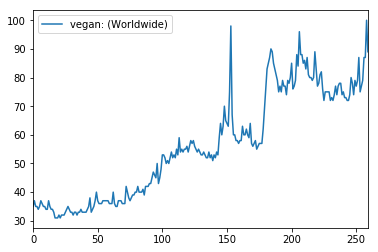

In [128]:
df.plot()

Let's convert to a time series object and use the "Week" column as our index.

In [129]:
from datetime import datetime

df['Week'] = pd.to_datetime(df['Week'])
df = df.set_index('Week')

# Check datatype of index
df.index

DatetimeIndex(['2014-01-19', '2014-01-26', '2014-02-02', '2014-02-09',
               '2014-02-16', '2014-02-23', '2014-03-02', '2014-03-09',
               '2014-03-16', '2014-03-23',
               ...
               '2018-11-04', '2018-11-11', '2018-11-18', '2018-11-25',
               '2018-12-02', '2018-12-09', '2018-12-16', '2018-12-23',
               '2018-12-30', '2019-01-06'],
              dtype='datetime64[ns]', name='Week', length=260, freq=None)

Now convert to a time series instead of a dataframe.

In [130]:
ts = df['vegan: (Worldwide)']
ts.head()

Week
2014-01-19    35
2014-01-26    37
2014-02-02    35
2014-02-09    35
2014-02-16    34
Name: vegan: (Worldwide), dtype: int64

We can do cool things now, like take a range.

In [131]:
ts['2018-01-01':'2018-03-01']

Week
2018-01-07    88
2018-01-14    88
2018-01-21    85
2018-01-28    86
2018-02-04    83
2018-02-11    87
2018-02-18    81
2018-02-25    80
Name: vegan: (Worldwide), dtype: int64

Or take all rows from a certain year.

In [132]:
ts['2017']

Week
2017-01-01    67
2017-01-08    60
2017-01-15    60
2017-01-22    58
2017-01-29    58
2017-02-05    57
2017-02-12    58
2017-02-19    58
2017-02-26    63
2017-03-05    60
2017-03-12    60
2017-03-19    62
2017-03-26    60
2017-04-02    59
2017-04-09    64
2017-04-16    57
2017-04-23    56
2017-04-30    57
2017-05-07    58
2017-05-14    55
2017-05-21    56
2017-05-28    57
2017-06-04    57
2017-06-11    57
2017-06-18    62
2017-06-25    69
2017-07-02    76
2017-07-09    83
2017-07-16    85
2017-07-23    87
2017-07-30    90
2017-08-06    89
2017-08-13    85
2017-08-20    83
2017-08-27    81
2017-09-03    79
2017-09-10    75
2017-09-17    77
2017-09-24    75
2017-10-01    79
2017-10-08    77
2017-10-15    77
2017-10-22    74
2017-10-29    79
2017-11-05    78
2017-11-12    80
2017-11-19    85
2017-11-26    76
2017-12-03    77
2017-12-10    79
2017-12-17    88
2017-12-24    84
2017-12-31    96
Name: vegan: (Worldwide), dtype: int64

Now, time also will appear on our plot.

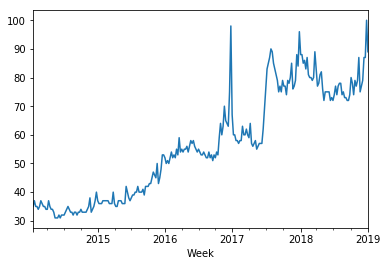

In [133]:
ts.plot()

We can decompose our data into the trend, seasonal and random parts.

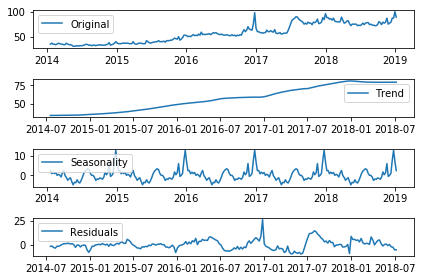

In [134]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

We already spotted that trend with our eyes earlier but now we can also see there is something happening around the start of every year - this could be interpreted as veganuary.

## Modelling

### Simple Time series model

The simplest model to predict the future is:

`today = yesterday + random`

What does this look like as a time series?

Let's prepare an array to put our data in and put the starting value as 70

In [138]:
walk = pd.Series(70)
walk

0    70
dtype: int64

Now we'll use our simple prediciton model `today = yesterday + random` for the next 1000 days

In [158]:
for i in range(1, 1000):
    walk[i] = walk[i-1] + np.random.normal() # random number is 'normally distributed'

Let's see it.

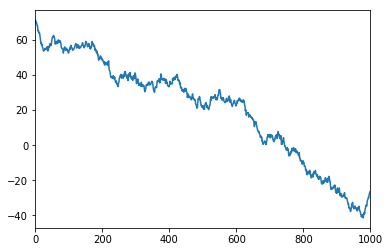

In [159]:
walk.plot()

Have a play with this for a few minutes, generate some different time series by re-running the above couple of code blocks. Some will look a bit wild, but some might look like there is a genuine trend (maybe up or down).

Randomness can generate a lot - maybe that vegan "trend" we saw above isn't really a trend afterall...?

One way to answer this question is to look at the `autocorrelation function` - i.e. how does the time series correlate with time lags of itself. 

Text(0.5, 1.0, 'Autocorrelation function')

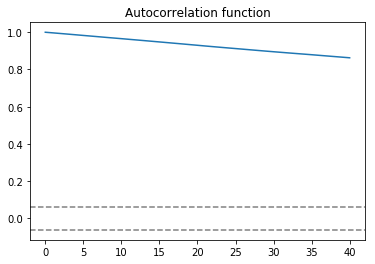

In [160]:
from statsmodels.tsa.stattools import acf

acf = acf(walk)

# Plot the ACF
plt.plot(acf)
plt.plot(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(walk)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(walk)), linestyle = '--', color = 'gray')
plt.title('Autocorrelation function')

The main take away when looking at these graphs is that if you have something that's significantly different from zero (outside of the blue lines) then it says there is something about the past that can help you predict the future. Otherwise if there is no correlation then you just have randomness which you can't predict.

We also have a technique to see how many days in the past are important - the `partial autocorrelation function`

Text(0.5, 1.0, 'Partial Autocorrelation function')

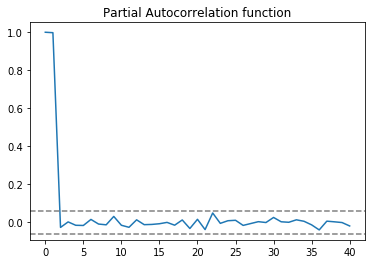

In [161]:
from statsmodels.tsa.stattools import pacf

pacf = pacf(walk)

# Plot the PACF
plt.plot(pacf)
plt.plot(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(walk)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(walk)), linestyle = '--', color = 'gray')
plt.title('Partial Autocorrelation function')

The PACF gives us information about the extra correlation you when you go back 1 day at a time.

In the above graph e.g. when we look at the line for lag 2 it's really small. This tells us that the extra correlation you get after you've already taken into account lag of 1  is essentially zero i.e. you don't really need to add an extra day in the past beyond the yesterday.

It's not too surprising that only lag 1 is significantly non-zero, remember we specified that today was like yesterday and no other days in the past.

Ok, a little test, what kind of `pacf` do you think we'd produce if we subtracted yesterday from today in our random walk ( remember that `today = yesterday +  randomness`) - we get randomness

Text(0.5, 1.0, 'Partial Autocorrelation function')

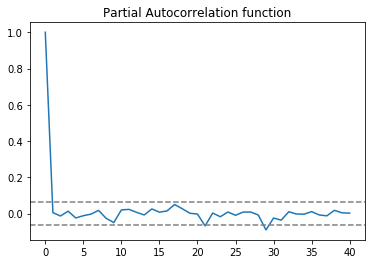

In [162]:
from statsmodels.tsa.stattools import pacf

difference = walk.diff().dropna()

pacf = pacf(difference)

# Plot the PACF
plt.plot(pacf)
plt.plot(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(walk)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(walk)), linestyle = '--', color = 'gray')
plt.title('Partial Autocorrelation function')

Indeed the above lines are all within the blue lines which essentially says that nothing is correlated with anything - randomness.

Now let's recall our thought that maybe the vegan trend might actually just be a random walk. We can test that hypothesis by looking at `pacf(diff(ts))` 

Text(0.5, 1.0, 'Partial Autocorrelation function')

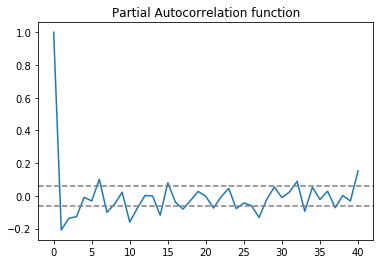

In [163]:
from statsmodels.tsa.stattools import pacf

difference = ts.diff().dropna()

pacf = pacf(difference)

# Plot the PACF
plt.plot(pacf)
plt.plot(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(walk)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(walk)), linestyle = '--', color = 'gray')
plt.title('Partial Autocorrelation function')

We've almost got randomness! So, that trend we saw with our eyes could pretty much be explained as a random process apparently.

Time to get a bit more series about our model building so we can sort out this contradiction.

### ARIMA modelling 

ARIMA is your goto to algorithm for generating time series models. It incorporates a lot of the ideas we've talked about and more

- AR - autoregression - the idea that today is like yesterday (we spent a lot of time talking about today)
- I - integrated - This uses the technique of differencing that we introduced today.
- MA - moving average - not actually what is sounds like, it's the idea that today depends on the randomness aka "shocks" from the past

These three parts require three parameters to be specified, known as p, d, and q respectively. Finding the right parameters can be tricky if you do it manually, so we've built some functions to help us do it quickly.

In [164]:
# These are the relevant libraries we'll use.
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [165]:
# This method finds the MSE of a single ARIMA model.
def evaluate_arima_model(data, arima_order):
    split=int(len(data) * 0.8) # Needs to be an integer because it is later used as an index.
    train, test = data[0:split], data[split:len(data)]
    past=[x for x in train]
    # make predictions
    predictions = list()
    for i in range(len(test)):#timestep-wise comparison between test data and one-step prediction ARIMA model. 
        model = ARIMA(past, order=arima_order)
        model_fit = model.fit(disp=0)
        future = model_fit.forecast()[0]
        predictions.append(future)
        past.append(test[i])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

In [166]:
# This method evaluates ARIMA models with several different p, d, and q values.
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    return print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [167]:
# Now, we choose a couple of values to try for each parameter.
p_values = [0, 1, 2, 4]
d_values = [x for x in range(0, 3)]
q_values = [x for x in range(0, 3)]

In [168]:
# Finally, we find the best ARIMA model for our data.
# This can take a while to execute.
import warnings
warnings.filterwarnings("ignore")
evaluate_models(ts, p_values, d_values, q_values)

ARIMA(0, 0, 1) MSE=248.959
ARIMA(0, 0, 2) MSE=104.387
ARIMA(0, 1, 1) MSE=17.908
ARIMA(0, 1, 2) MSE=17.867
ARIMA(0, 2, 1) MSE=20.183
ARIMA(1, 0, 0) MSE=19.829
ARIMA(1, 0, 1) MSE=17.921
ARIMA(1, 0, 2) MSE=17.854
ARIMA(1, 1, 0) MSE=18.369
ARIMA(1, 1, 1) MSE=18.932
ARIMA(1, 2, 0) MSE=32.772
ARIMA(1, 2, 1) MSE=18.753
ARIMA(2, 0, 0) MSE=18.356
ARIMA(2, 1, 0) MSE=18.299
ARIMA(2, 1, 1) MSE=16.466
ARIMA(2, 1, 2) MSE=16.920
ARIMA(2, 2, 0) MSE=29.534
ARIMA(2, 2, 1) MSE=18.715
ARIMA(2, 2, 2) MSE=19.163
ARIMA(4, 0, 0) MSE=17.734
ARIMA(4, 0, 1) MSE=17.872
ARIMA(4, 1, 0) MSE=17.828
ARIMA(4, 2, 0) MSE=25.013
Best ARIMA(2, 1, 1) MSE=16.466


Now that we know the best ARIMA model of the parameter ranges we chose, we can build the actual model.

In [174]:
p=2
d=1
q=1
model = ARIMA(ts, order=(p,d,q))
model_fit = model.fit()
forecast = model_fit.forecast(52)

We can take a look at a summary of the model this library has built around our data.

In [170]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARIMA Model Results                               
================================================================================
Dep. Variable:     D.vegan: (Worldwide)   No. Observations:                  259
Model:                   ARIMA(2, 1, 1)   Log Likelihood                -716.046
Method:                         css-mle   S.D. of innovations              3.819
Date:                  Mon, 27 May 2019   AIC                           1442.092
Time:                          23:12:54   BIC                           1459.876
Sample:                      01-26-2014   HQIC                          1449.242
                           - 01-06-2019                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2291      0.020     11.495      0.000       0.190       0.268
ar.L1.D.vegan: (Worldwide)     0.7170      0.062     11.529      0.000       0.595       0.839
ar.L2.D.vegan: (Worldwide)     0.1361      0.063      2.160      0.032       0.013       0.260
ma.L1.D.vegan: (Worldwide)    -1.0000      0.012    -82.324      0.000      -1.024      -0.976
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1456           +0.0000j            1.1456            0.0000
AR.2           -6.4152           +0.0000j            6.4152            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

And then plot those predictions of our data.

In [171]:
model_fit.predict()

2014-01-26    0.229062
2014-02-02   -0.141981
2014-02-09    0.616910
2014-02-16    0.343103
2014-02-23    0.586991
2014-03-02    0.222819
2014-03-09   -0.086568
2014-03-16    0.459637
2014-03-23    0.575217
2014-03-30    0.448285
2014-04-06    0.705709
2014-04-13    0.575578
2014-04-20   -0.148074
2014-04-27    0.792294
2014-05-04    0.773812
2014-05-11    0.645132
2014-05-18    0.907751
2014-05-25    1.278860
2014-06-01    1.000982
2014-06-08    1.004721
2014-06-15    0.755266
2014-06-22    1.158462
2014-06-29    0.768729
2014-07-06    0.917930
2014-07-13    0.927716
2014-07-20    0.680229
2014-07-27    0.574882
2014-08-03    0.471885
2014-08-10    0.889910
2014-08-17    1.026978
                ...   
2018-06-17    0.974051
2018-06-24    1.840346
2018-07-01    1.179396
2018-07-08    1.623239
2018-07-15    0.956407
2018-07-22    0.421517
2018-07-29    1.698560
2018-08-05    0.480296
2018-08-12    0.641252
2018-08-19    0.808430
2018-08-26    1.954976
2018-09-02    1.157628
2018-09-09 

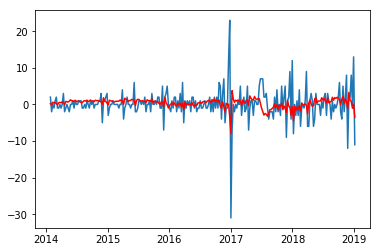

In [172]:
plt.plot(ts.diff())
plt.plot(model_fit.predict(), color = 'red')

We can then predict future values.

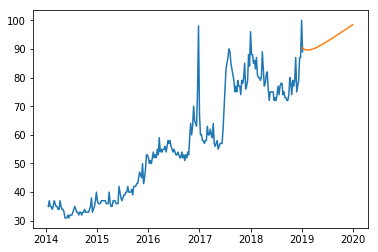

In [173]:
periods_to_forecast = 52

date_range = pd.date_range(df.index[-1], periods = periods_to_forecast, 
              freq='W').strftime("%Y-%m-%d").tolist()

future_weeks = pd.DataFrame(date_range, columns = ['Week'])

future_weeks['Week'] = pd.to_datetime(future_weeks['Week'])
future_weeks.set_index('Week', inplace = True)

future_weeks['Prediction'] = forecast[0]

future_weeks

plt.plot(ts)
plt.plot(future_weeks)
plt.show()